In [1]:
import numpy as np
import pandas as pd
import utils
from scipy import signal 
import matplotlib.pyplot as plt
import os

Accelerometer format: Time (s), X (m/s^2), Y (m/s^2), Z (m/s^2) \
Gyroscope format: Time (s), X (rad/s), Y (rad/s), Z (rad/s)

In [13]:
# load csv data as pandas dataframe

filename_acc = 'data/gebaeude64/Accelerometer.csv'
filename_gyro = 'data/gebaeude64/Gyroscope.csv'

acc_df = pd.read_csv(filename_acc, sep=',',header=0)
gyro_df = pd.read_csv(filename_gyro, sep=',',header=0)
gyro_df

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.048244,-0.313532,0.400172,-0.457600
1,0.058258,-0.332125,0.443448,-0.440168
2,0.068272,-0.290050,0.380218,-0.405554
3,0.078286,-0.209888,0.236949,-0.377846
4,0.088299,-0.143626,0.097941,-0.383651
...,...,...,...,...
17894,179.244763,-0.234529,0.110128,0.026189
17895,179.254777,-0.359755,0.111809,0.003131
17896,179.264792,-0.268038,0.068637,-0.013516
17897,179.274806,-0.010159,-0.051150,-0.043892


In [4]:
# dataframe to numpy array

acc = np.asarray([
    acc_df['Time (s)'].to_numpy(dtype=float),
    acc_df['X (m/s^2)'].to_numpy(dtype=float), 
    acc_df['Y (m/s^2)'].to_numpy(dtype=float), 
    acc_df['Z (m/s^2)'].to_numpy(dtype=float)
])
gyro = np.asarray([
    gyro_df['Time (s)'].to_numpy(dtype=float),
    gyro_df['X (rad/s)'].to_numpy(dtype=float), 
    gyro_df['Y (rad/s)'].to_numpy(dtype=float), 
    gyro_df['Z (rad/s)'].to_numpy(dtype=float)
])

gyro

array([[ 4.82437917e-02,  5.82577917e-02,  6.82717917e-02, ...,
         1.79264792e+02,  1.79274806e+02,  1.79284821e+02],
       [-3.13532293e-01, -3.32124949e-01, -2.90049672e-01, ...,
        -2.68038362e-01, -1.01593006e-02,  2.12778166e-01],
       [ 4.00171638e-01,  4.43447739e-01,  3.80217910e-01, ...,
         6.86370432e-02, -5.11502661e-02, -1.30338833e-01],
       [-4.57599580e-01, -4.40168381e-01, -4.05553669e-01, ...,
        -1.35164857e-02, -4.38915193e-02, -6.16073981e-02]])

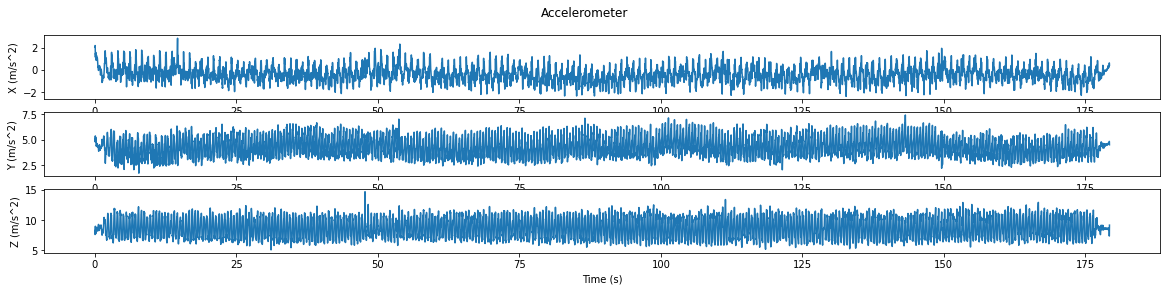

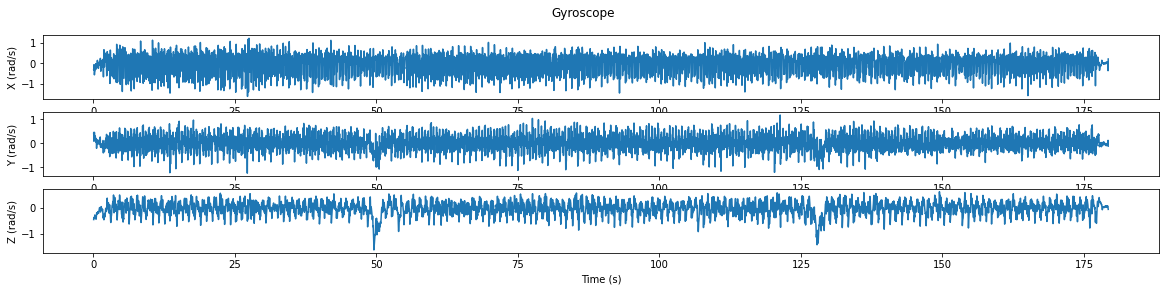

In [5]:
utils.plot_acc(acc, 'all')
utils.plot_gyro(gyro, 'all')

In [6]:
# norm of accelerometer & gyroscope

acc_norm = np.linalg.norm(acc[1::], axis=0)
acc_norm = np.array([acc[0], acc_norm])
gyro_norm = np.linalg.norm(gyro[1::], axis=0)
gyro_norm = np.array([gyro[0], gyro_norm])


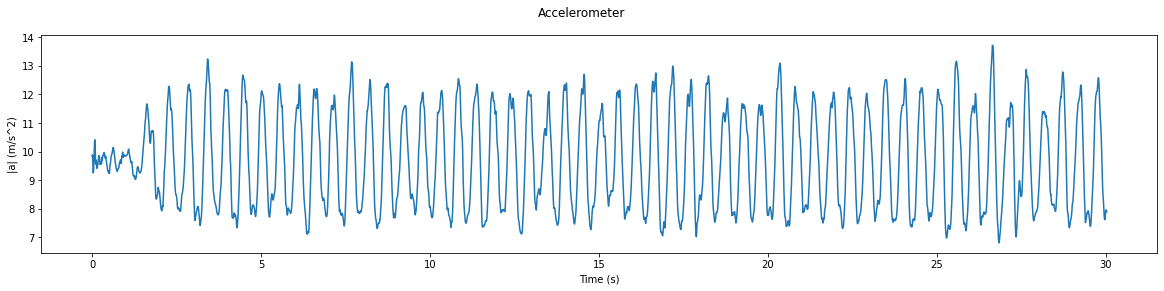

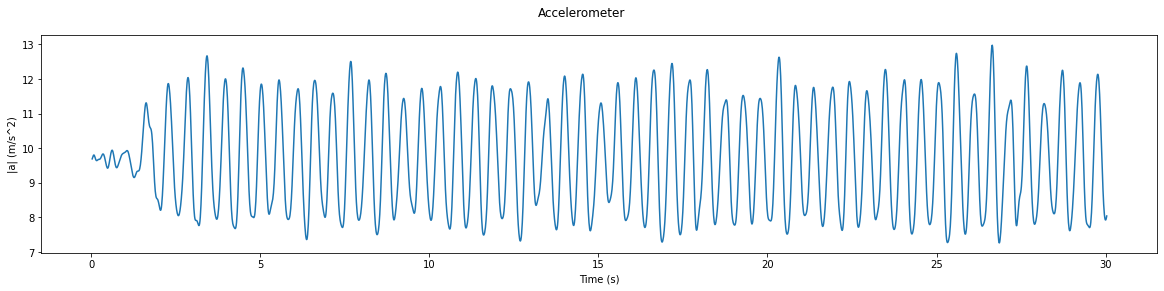

In [15]:
# filter signals with weighed moving average filter

filtered_acc = utils.weighted_moving_average(acc_norm, dim=1, wl=21)
filtered_gyro = utils.weighted_moving_average(gyro_norm, dim=1, wl=21)

utils.plot_acc(acc_norm[0:3000, 0:3000], type='norm')
utils.plot_acc(filtered_acc[0:3000, 0:3000], type='norm')


In [14]:
# save to folder

filename = os.path.basename(os.path.dirname(filename_acc))

np.save("preprocessed_data/" + filename + "_acc.npy", filtered_acc)
np.save("preprocessed_data/" + filename + "_gyro.npy", filtered_gyro)